In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

from collections import Counter

#reading the Data
data = pd.read_csv(r"C:\Users\aybha\Desktop\Data Science\Final-Project\Admission_Prediction\Admission_Predict_Ver1.1.csv")

#shape of the dataset
print("Shape of data: ", data.shape)

Shape of data:  (500, 9)


In [2]:
#combining the datasets which have same columns

print("Shape: ", data.shape)
data.head()

Shape:  (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#knowing the statistic values
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
null = data.isnull()
print(data.isnull().any().any())
print(null.sum())

False
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [6]:
'''By using the tukey method to find the n outliers by taking the 
dataframe of the features and returning the list of indices.'''

def detect_outliers(data, n, features):
    outlier_indices = []
    #iterating over the features(columns)
    for col in features:
        q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        q3 = np.percentile(data[col], 75)
        #Interquartile range (IQR)
        iqr = q3 - q1
        
        #outlier step
        outlier_step = 1.5 * iqr
        
        outlier_list_col = data[(data[col] < q1 - outlier_step) | (data[col] > q3 + outlier_step)].index
        
        #append the found outlier indices for col to the ist of outlier indices
        outlier_indices.extend(outlier_list_col)
        
    #selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
outliers_to_drop = detect_outliers(data, 2, ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'])
    

In [7]:
data.loc[outliers_to_drop]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [8]:
cols = data.drop(labels = 'Serial No.', axis = 1)
cols.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
cols.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


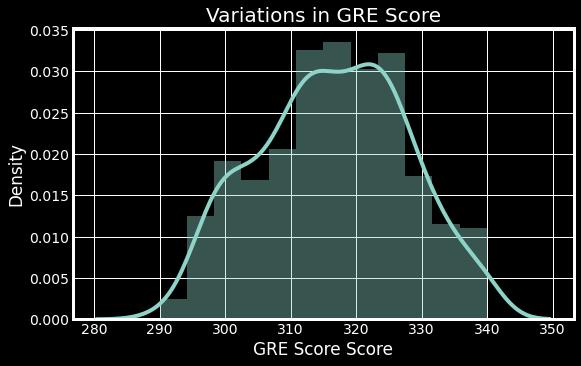

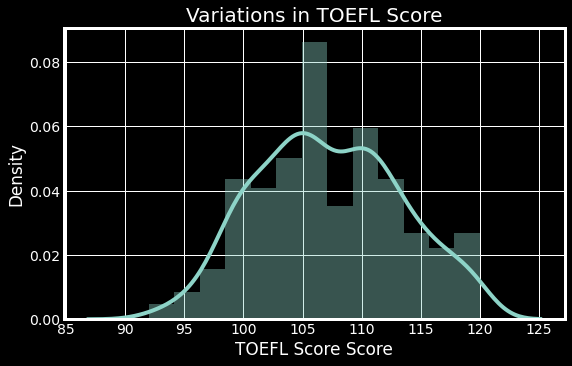

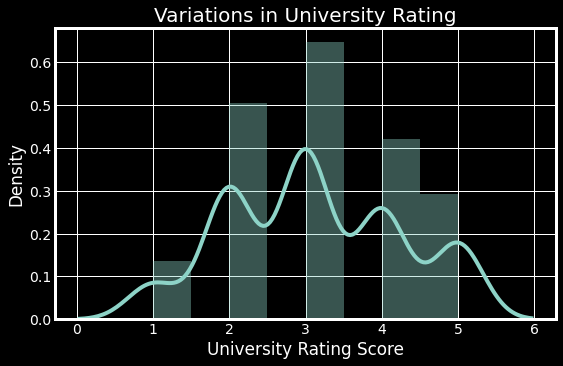

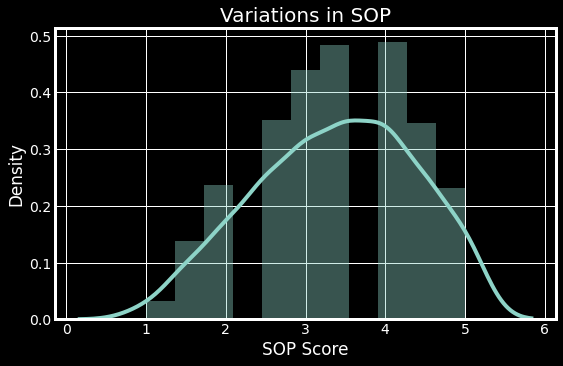

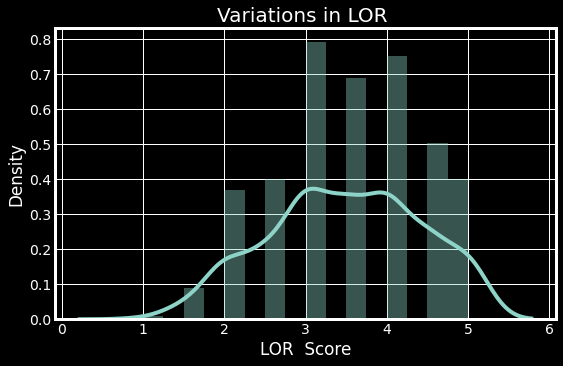

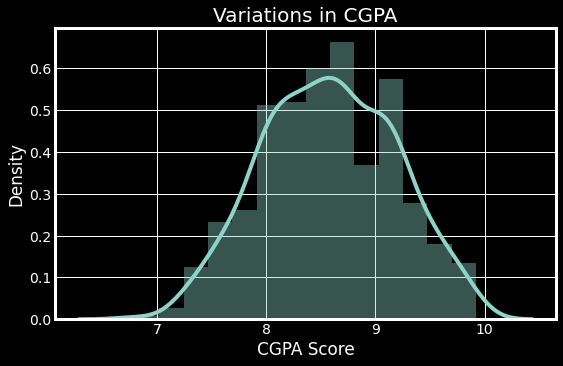

In [9]:
#GRE variations among students

import warnings
warnings.filterwarnings('ignore')
exam = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('dark_background')
for val in exam:
    sns.distplot(data[val])
    plt.title('Variations in {}'.format(val), fontsize = 20)
    plt.xlabel('{} Score'.format(val))
    plt.show()

In [10]:
'''Students who had done research vs no research '''
data_re = data['Research'].value_counts()

label_re = data_re.index
size_re = data_re.values

colors = ['aqua', 'gold']

trace = go.Pie(
         labels = label_re, values = size_re, marker = dict(colors = colors), name = 'Research', hole = 0.3)

df = [trace]

layout1 = go.Layout(
           title = 'Research work done or Not')
fig = go.Figure(data = df, layout = layout1)
py.iplot(fig)

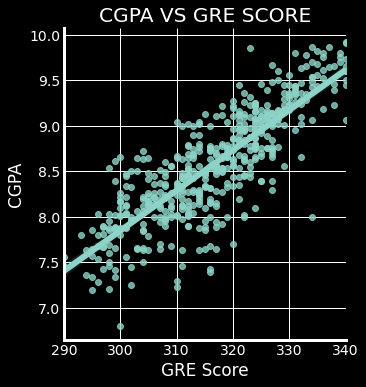

In [11]:
import plotly.express as px
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('dark_background')
fig=sns.lmplot(x='GRE Score',y='CGPA',data=data)
plt.title("CGPA VS GRE SCORE")
plt.show()

px.scatter(data, x = 'GRE Score', y = 'Chance of Admit ', color = 'University Rating', width=600, height=500)
#From this we can say that the person who did well in Under-Grad also did
#well in GRE.

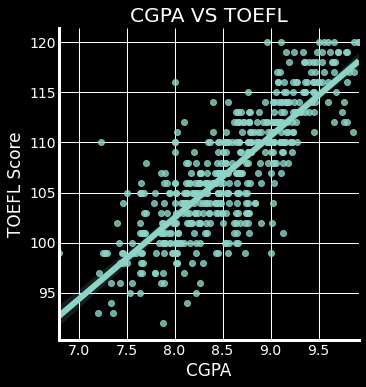

In [12]:
fig=sns.lmplot(x='CGPA',y='TOEFL Score',data=data)
plt.title("CGPA VS TOEFL")
plt.show()

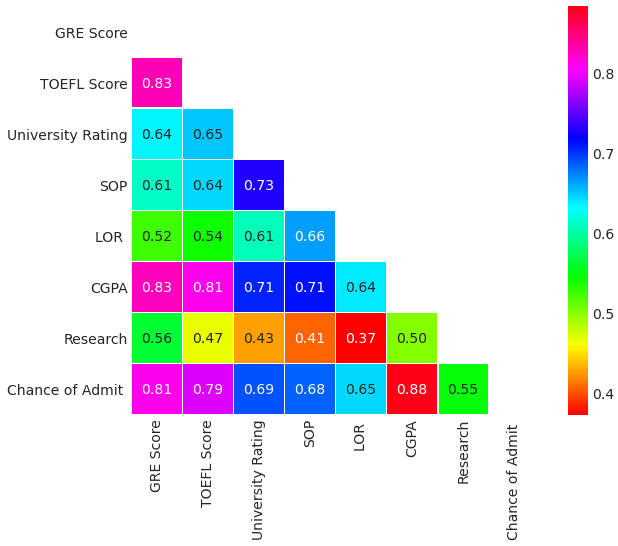

In [13]:
corr = cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

#Here we can see that the chance of admit is highly correlated with CGPA, GRE and TOEFL scores.

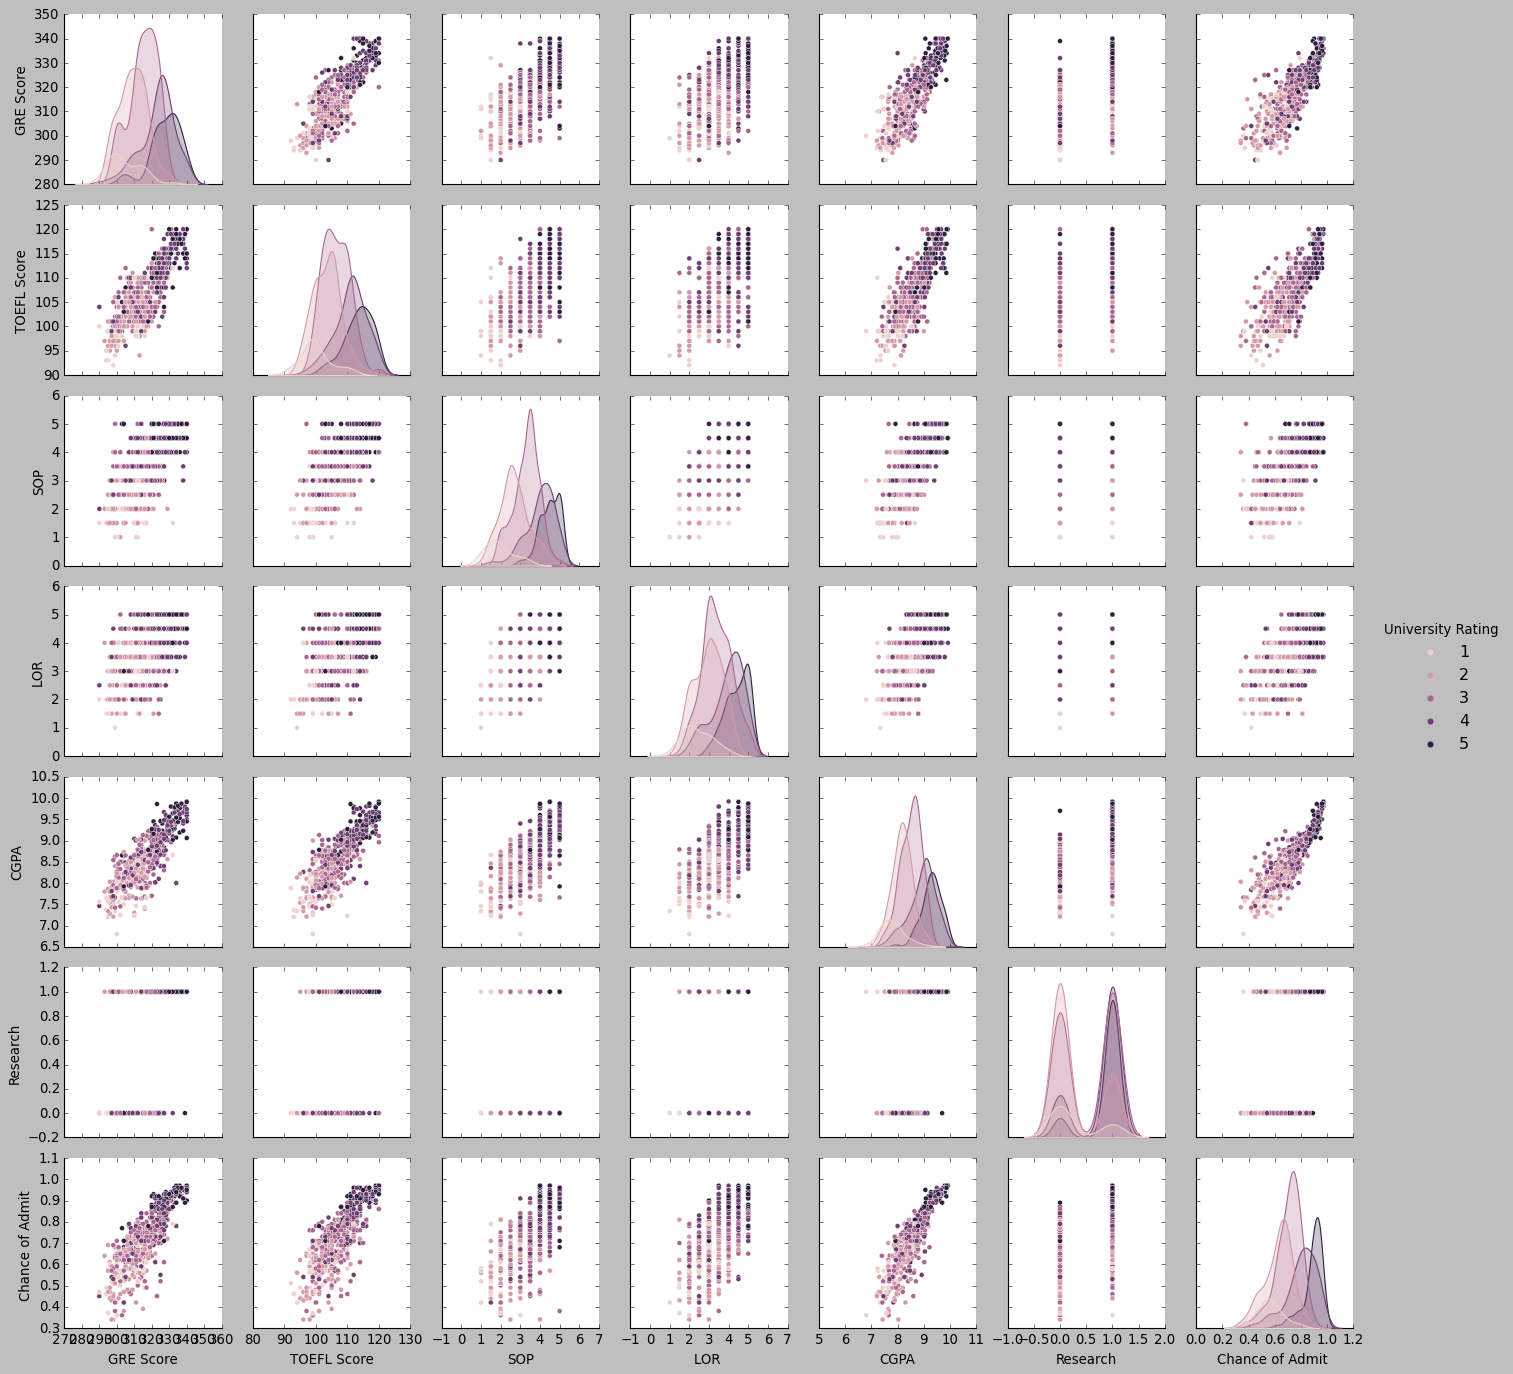

In [14]:
plt.style.use('classic')
sns.pairplot(data = cols, kind ='scatter',hue = 'University Rating')
#plt.title('PAIR WISE PLOT')
plt.show()
#GRE score TOEFL score and CGPA all are linearly related to each other
#Research Students tend to Score higher by all means

In [15]:
print("Average GRE Score :{0:.2f} out of 340".format(data['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(data['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(data['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(data['Chance of Admit '].mean()*100))

Average GRE Score :316.47 out of 340
Average TOEFL Score:107.19 out of 120
Average CGPA:8.58 out of 10
Average Chance of getting admitted:72.17%


In [16]:
toppers=data[(data['GRE Score']>=330) & (data['TOEFL Score']>=115) & (data['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,203,340,120,5,4.5,4.5,9.91,1,0.97
143,144,340,120,4,4.5,4.0,9.92,1,0.97
24,25,336,119,5,4.0,3.5,9.80,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
213,214,333,119,5,5.0,4.5,9.78,1,0.96
385,386,335,117,5,5.0,5.0,9.82,1,0.96
148,149,339,116,4,4.0,3.5,9.80,1,0.96
81,82,340,120,4,5.0,5.0,9.50,1,0.96
496,497,337,117,5,5.0,5.0,9.87,1,0.96
23,24,334,119,5,5.0,4.5,9.70,1,0.95


In [17]:
'''From the data visualization, we conclude that the 
relationship between the features and the chances 
of admission is linear. So, we can try a linear regression 
model for fitting this dataset.

My model for this project would be a pre-defined classifier 
from sklearn library, which is open-source and contains many 
pre-tested collections of useful classifiers. I will use the 
LinearRegression from this collection.

'''
print(cols.columns.values)
features = cols.columns.values
rm = np.array(['Chance of Admit '])
idx = np.in1d(features, rm)
print(features[~idx])

['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research' 'Chance of Admit ']
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research']


In [18]:
'''Why do we want linear regression model?
This is a supervised model data and also the independent variable X 
having the parameters GRE, TOEFL etc are in high relationship
with the dependent variable y being the chance of admit

From data visualization, we conclude that the relationship between the
features and the chances of admission is linear. So, we can try a linear 
regression model for fitting this dataset..'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

'''Splititng the data as x and y where x contains the dependent variable
data and y contains the independent variable data'''

x = cols.drop(['Research', 'Chance of Admit '], axis = 'columns')
y = cols['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 9, test_size = 0.25)

In [19]:
x = x_train

In [20]:
x_train.shape

(375, 6)

In [21]:
x_test.shape

(125, 6)

In [22]:
y_train.shape

(375,)

In [23]:
y_test.shape

(125,)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
print('Error: Mean Squared Erorr: ', mean_squared_error(y_test, y_pred))

'''the mean squared error (MSE) of an estimator measures the 
average of the squares of the errors—that is, the average squared
difference between the predicted values and the actual values.'''

Error: Mean Squared Erorr:  0.003305732805440899


'the mean squared error (MSE) of an estimator measures the \naverage of the squares of the errors—that is, the average squared\ndifference between the predicted values and the actual values.'

In [25]:
list(zip(x_train.columns, lin_reg.coef_))
#CGPA explains most of the relationship between CGPA+GRE+TOEFL

[('GRE Score', 0.0023913198253033056),
 ('TOEFL Score', 0.003176859922039782),
 ('University Rating', 0.012662652466797285),
 ('SOP', -0.0027687461046757072),
 ('LOR ', 0.01660792969341525),
 ('CGPA', 0.1135506145164995)]

In [26]:
print(lin_reg.score(x_test, y_test))
print(r2_score(y_test, y_pred))

#The linear regression gave an accuracy of 81.57

0.8157931663792916
0.8157931663792916


<AxesSubplot:xlabel='Value', ylabel='Feature'>

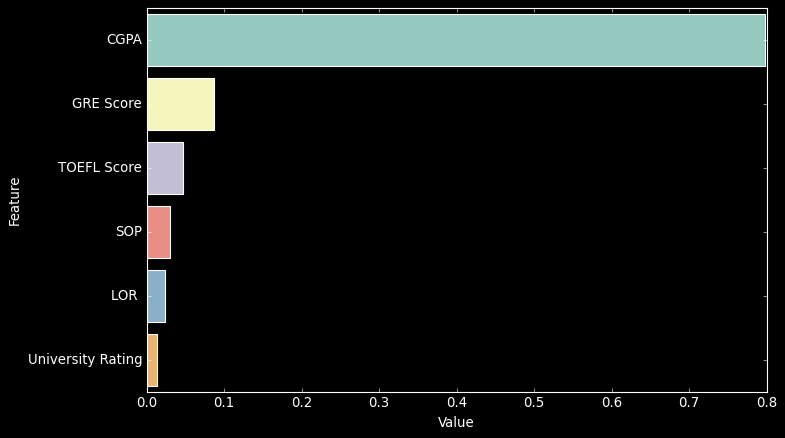

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(x_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, x.columns)), columns=['Value','Feature']) 
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))

In [28]:
print('The chance of getting an admit in US for a student is {}'.format(round(lin_reg.predict([[305, 108, 4, 4.5, 4.5, 8.35]])[0]*100, 1)))

The chance of getting an admit in US for a student is 69.5
